https://thecleverprogrammer.com/2020/11/22/pneumonia-detection-with-python/

https://www.kaggle.com/code/damiandbx/pneumonia-cnn-accuracy-93

In [3]:
import numpy as np

In [4]:
import tensorflow as tf


In [5]:
import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



In [6]:

from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import cv2
import random
%matplotlib inline

In [8]:
train_dir = r"C:\Users\akhil\Documents\NareshIT\Projects\Kaggle\Pneumonia Detection\chest_xray\train"
val_dir =  r"C:\Users\akhil\Documents\NareshIT\Projects\Kaggle\Pneumonia Detection\chest_xray\val"
test_dir =  r"C:\Users\akhil\Documents\NareshIT\Projects\Kaggle\Pneumonia Detection\chest_xray\test"

In [9]:
pneumonia = os.listdir(r"C:\Users\akhil\Documents\NareshIT\Projects\Kaggle\Pneumonia Detection\chest_xray\train\PNEUMONIA")
normal=os.listdir(r"C:\Users\akhil\Documents\NareshIT\Projects\Kaggle\Pneumonia Detection\chest_xray\train\NORMAL")

In [10]:
len(pneumonia)+len(normal)

5216

In [11]:
def plot_images(dirr,folder):
    plt.figure(figsize=(20,20))
    for index,img in enumerate(random.sample(dirr,6)):
        plt.subplot(230+index+1)
        img_rgb=cv2.cvtColor(cv2.imread(os.path.join(train_dir,folder,img)),cv2.COLOR_BGR2GRAY)
        plt.imshow(img_rgb,cmap='gray')

In [12]:
plot_images(normal,"NORMAL")

In [13]:
plot_images(pneumonia,"PNEUMONIA")

In [14]:
len(pneumonia),len(normal)

(3875, 1341)

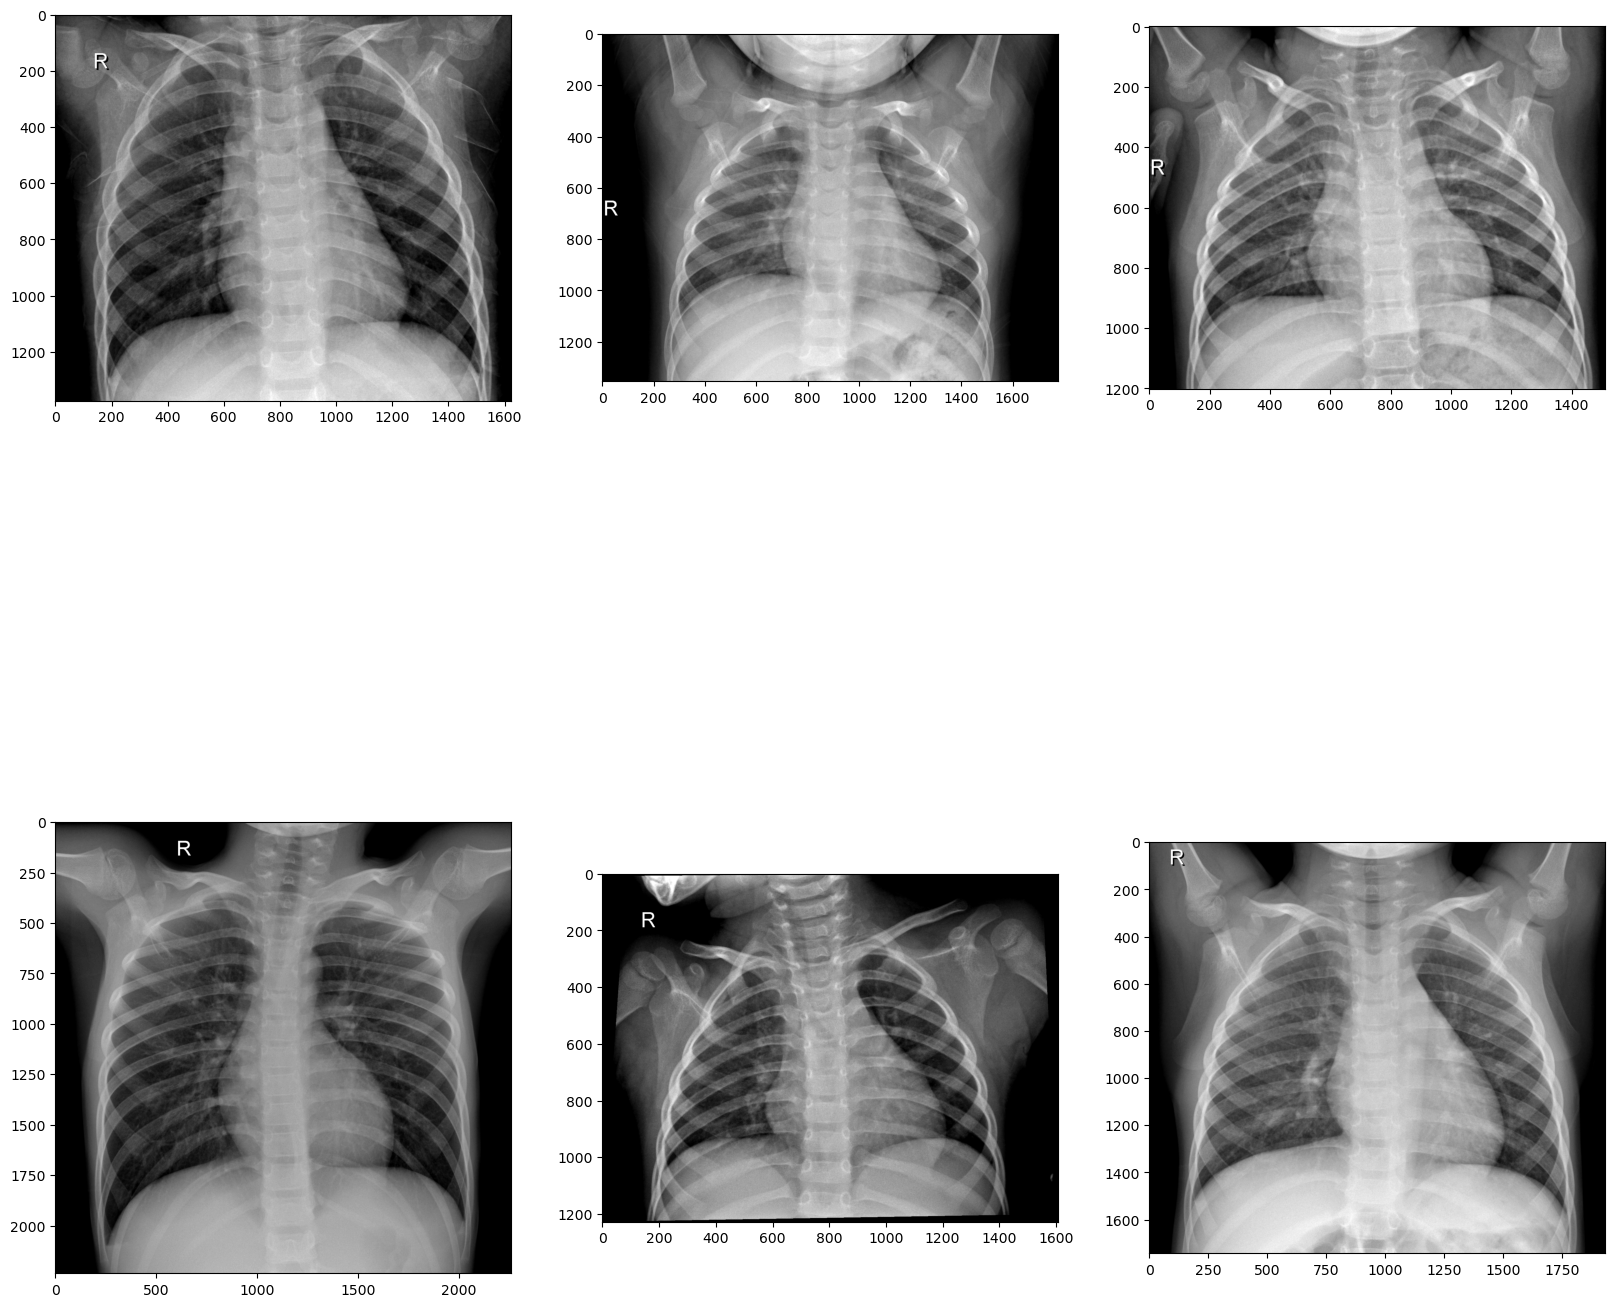

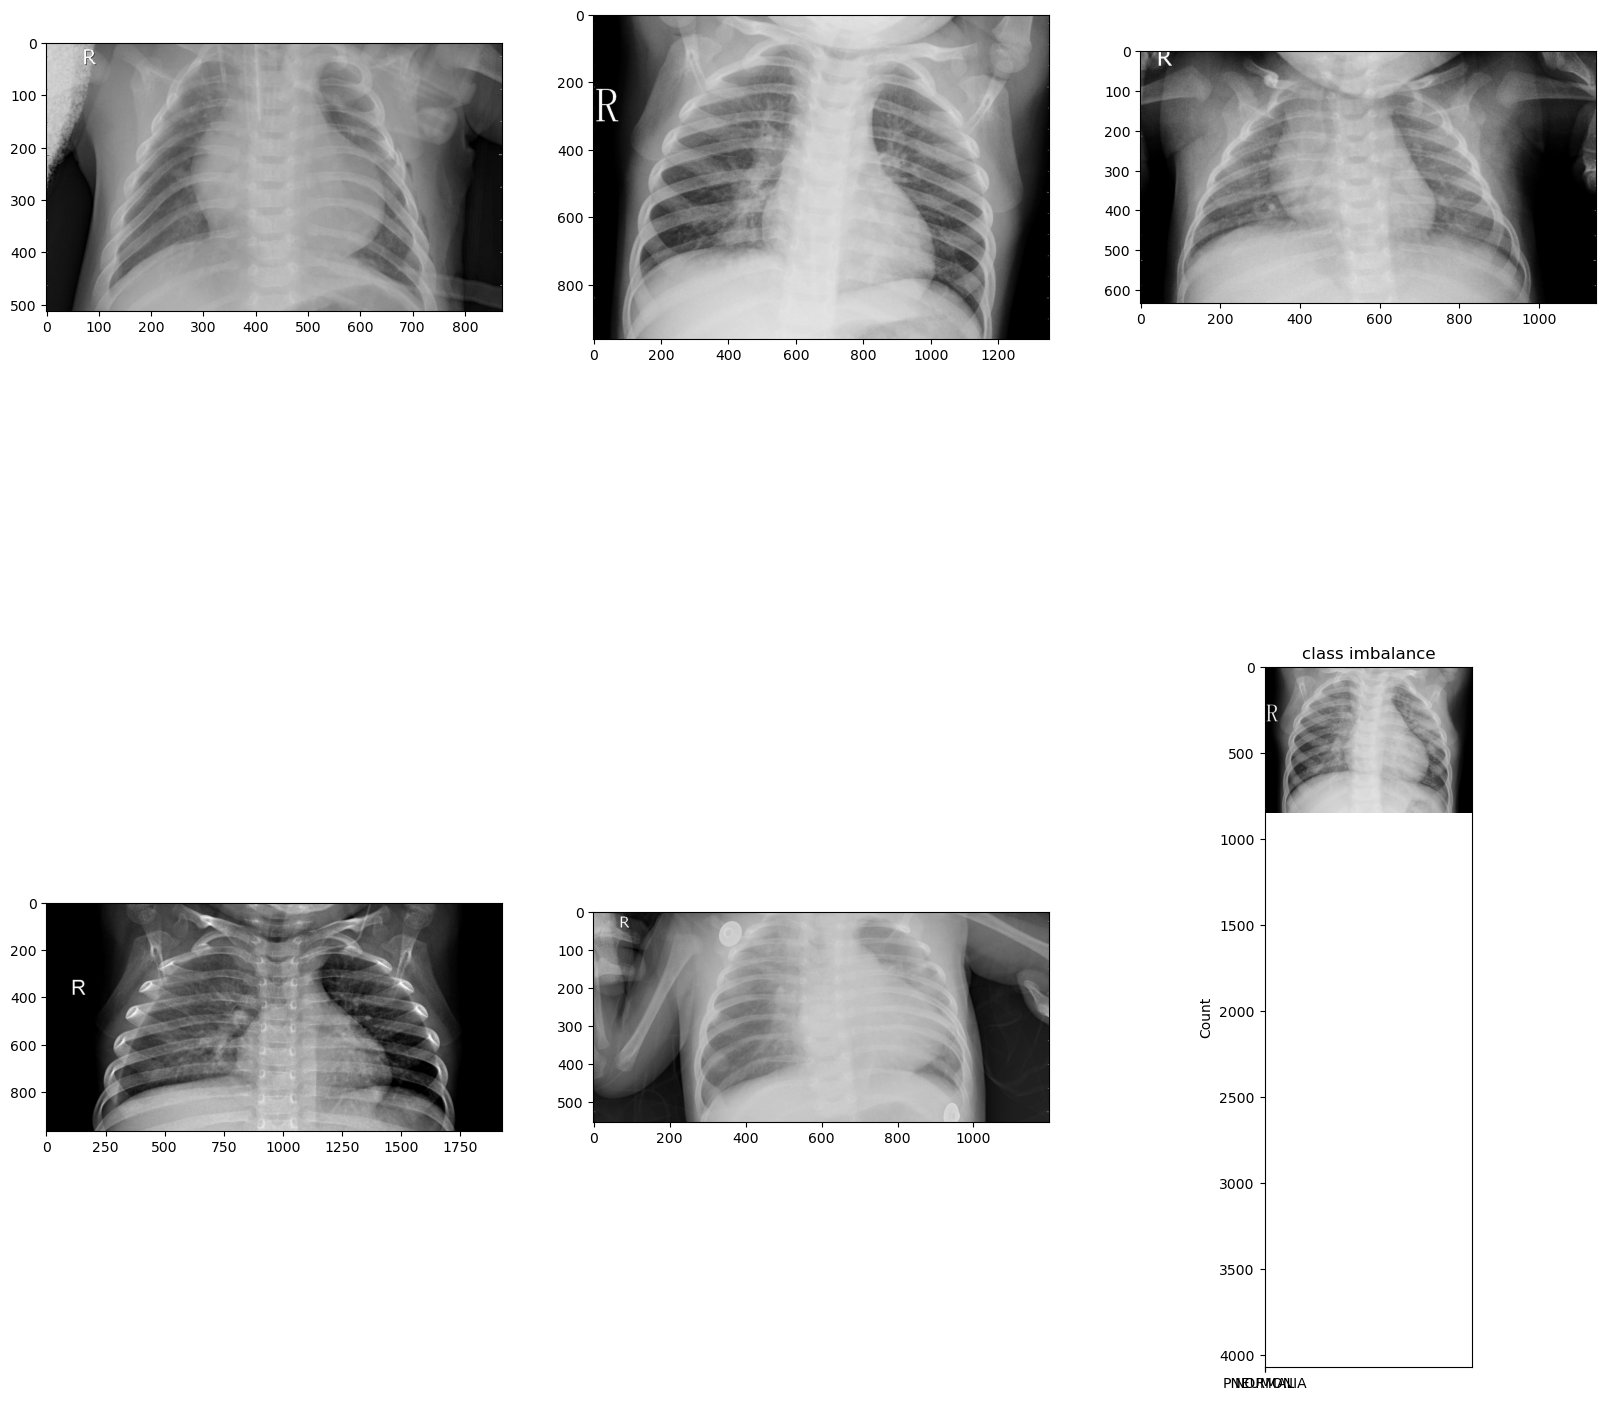

In [15]:
counts={"NORMAL":len(normal),"PNEUMONIA":len(pneumonia)}

plt.bar(list(counts.keys()),list(counts.values()),color='maroon')

plt.xlabel(' ')
plt.ylabel('Count')
plt.title('class imbalance')
plt.show()

In [16]:
bias=np.log([len(pneumonia)/len(normal)])
bias

array([1.06113006])

In [17]:
# dataset loading and prep for training
batch_size=32
img_height=150
img_width=150

train_data=tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size)

test_data=tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size)

val_data=tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [18]:
train_data.class_names

['NORMAL', 'PNEUMONIA']

In [19]:
#model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Rescaling,BatchNormalization
from tensorflow.keras.regularizers import l2  

In [20]:
cnn_model=Sequential([
    Rescaling(1/255),
    Conv2D(32,3,activation='relu',kernel_regularizer=l2(0.0001)),
    Conv2D(32,3,activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(64, 3, activation='relu', kernel_regularizer=l2(0.0001)),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(128, 3, activation='relu', kernel_regularizer=l2(0.0001)),
    MaxPooling2D(),
    Dropout(0.2),
            
    Conv2D(256, 3, activation='relu', kernel_regularizer=l2(0.0001)),
    MaxPooling2D(),
    Dropout(0.2),

    Flatten(),
    Dense(units=64,activation='relu'),
    Dropout(0.5),
    Dense(units=1,activation='sigmoid')
]
                    )
    

In [21]:
#we will assign new wei

In [22]:
class_0 = 5216/(2*1342)
class_1 = 5216/(2*3876)

class_weights = {0: class_0, 1: class_1}

print('Class 0: {:.2f}'.format(class_0))
print('Class 1: {:.2f}'.format(class_1))

Class 0: 1.94
Class 1: 0.67


In [23]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam

early_stopping_cb=EarlyStopping(monitor='val_loss',min_delta=0.0001,verbose=1,patience=5,restore_best_weights=True)

cnn_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001,beta_1=0.92,beta_2=0.999),
                  metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])
cnn_model_hist=cnn_model.fit(train_data,epochs=40,class_weight=class_weights,validation_data=test_data,callbacks=[early_stopping_cb])

Epoch 1/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 877ms/step - accuracy: 0.6918 - loss: 0.5966 - precision: 0.8856 - recall: 0.6581 - val_accuracy: 0.6763 - val_loss: 0.6292 - val_precision: 0.6615 - val_recall: 0.9872
Epoch 2/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 154s 938ms/step - accuracy: 0.9302 - loss: 0.2252 - precision: 0.9783 - recall: 0.9254 - val_accuracy: 0.7131 - val_loss: 0.5461 - val_precision: 0.6881 - val_recall: 0.9897
Epoch 3/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 936ms/step - accuracy: 0.9367 - loss: 0.1769 - precision: 0.9816 - recall: 0.9310 - val_accuracy: 0.7692 - val_loss: 0.4955 - val_precision: 0.7365 - val_recall: 0.9821
Epoch 4/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 153s 933ms/step - accuracy: 0.9535 - loss: 0.1534 - precision: 0.9826 - recall: 0.9535 - val_accuracy: 0.8301 - val_loss: 0.3991 - val_precision: 0.7996 - val_recall: 0.9718
Epoch 5/40
163/163 ━━━━━━━━━━━━━━━━━━━━ 2405s 15s/step - accuracy: 0.9468 - loss: 0.1601 - precision: 0.9840 - recall: 0.9428 - val_accuracy: 0.

In [24]:
#evaluation
results_train=cnn_model.evaluate(train_data,batch_size=128)
results_train

163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.9114 - loss: 0.2422 - precision: 0.9996 - recall: 0.8794


[0.24213844537734985,
 0.9106594920158386,
 0.9991215467453003,
 0.8805161118507385]

In [25]:
results_test=cnn_model.evaluate(test_data,batch_size=128)
results_test

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.8972 - loss: 0.3037 - precision: 0.9006 - recall: 0.9430


[0.3272361159324646,
 0.8862179517745972,
 0.8788598775863647,
 0.9487179517745972]

In [26]:
results_val=cnn_model.evaluate(val_data,batch_size=128)
results_val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7500 - loss: 0.3767 - precision: 1.0000 - recall: 0.5000


[0.37671834230422974, 0.75, 1.0, 0.5]

In [28]:
import pandas as pd

In [46]:
 pd.DataFrame(cnn_model_hist.history).plot(figsize=(8,5))

<Axes: >

In [48]:
%matplotlib inline

In [50]:
print(cnn_model_hist.history)

{'accuracy': [0.7985045909881592, 0.9296395778656006, 0.9413343667984009, 0.9501533508300781, 0.9472776055335999, 0.9574386477470398, 0.9612730145454407, 0.9614647030830383, 0.9689416885375977, 0.9643405079841614, 0.9689416885375977], 'loss': [0.4383101165294647, 0.217374786734581, 0.17732208967208862, 0.16457805037498474, 0.16109304130077362, 0.14931905269622803, 0.13245004415512085, 0.13248933851718903, 0.11491439491510391, 0.11966270208358765, 0.11357992142438889], 'precision': [0.9339274764060974, 0.9774088263511658, 0.9826886653900146, 0.983159601688385, 0.9830917716026306, 0.98564213514328, 0.9898639917373657, 0.9885638356208801, 0.9902297258377075, 0.9883505702018738, 0.9910076856613159], 'recall': [0.7842580676078796, 0.9267096519470215, 0.9375483989715576, 0.9491612911224365, 0.9452903270721436, 0.9566451907157898, 0.95767742395401, 0.9592258334159851, 0.9677419066429138, 0.9633548259735107, 0.966967761516571], 'val_accuracy': [0.6762820482254028, 0.7131410241127014, 0.7692307

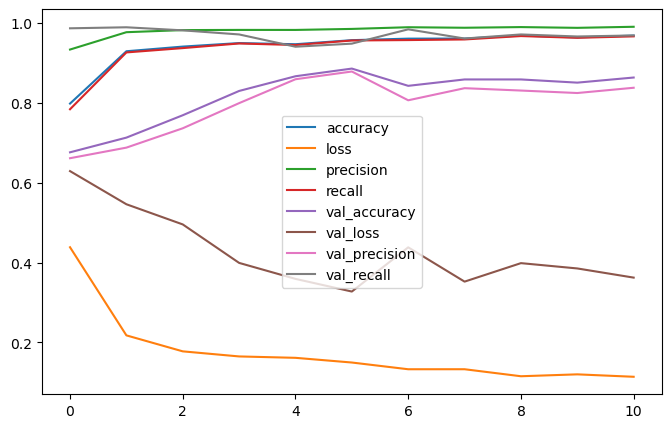

In [52]:

plt.show()

In [54]:
 y_pred= cnn_model.predict(test_data, batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step


In [56]:
y_pred

array([[0.91485244],
       [0.8535111 ],
       [0.987052  ],
       [0.89471525],
       [0.6040391 ],
       [0.87677675],
       [0.78533596],
       [0.15263234],
       [0.15746282],
       [0.9548103 ],
       [0.8409626 ],
       [0.6849392 ],
       [0.9872115 ],
       [0.9332173 ],
       [0.99482423],
       [0.9969355 ],
       [0.34297583],
       [0.17557119],
       [0.00111111],
       [0.97805196],
       [0.792794  ],
       [0.16301858],
       [0.7067418 ],
       [0.7663212 ],
       [0.42892987],
       [0.9893093 ],
       [0.9274273 ],
       [0.87642443],
       [0.49442646],
       [0.9202535 ],
       [0.8395636 ],
       [0.9840385 ],
       [0.92630154],
       [0.42611015],
       [0.7431996 ],
       [0.38789153],
       [0.11715899],
       [0.9838327 ],
       [0.9679531 ],
       [0.86672807],
       [0.08350099],
       [0.7678751 ],
       [0.83710814],
       [0.9993171 ],
       [0.9128201 ],
       [0.00834558],
       [0.97037494],
       [0.985

In [58]:
predictions = cnn_model.predict(test_data)

y_pred = []
y_true = []

for image_batch, label_batch in test_data:
   y_true.append(label_batch)
   preds = cnn_model.predict(image_batch)
   y_pred.append(np.where(preds > 0.5, 1, 0))

true_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


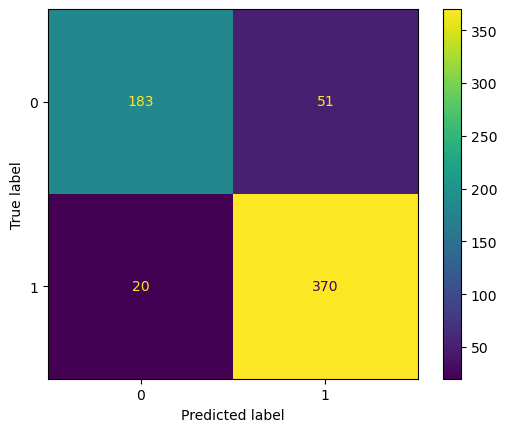

In [60]:
plt.show()

In [62]:
#classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       234
           1       0.88      0.95      0.91       390

    accuracy                           0.89       624
   macro avg       0.89      0.87      0.87       624
weighted avg       0.89      0.89      0.88       624

